# Student Performance Indicator

## Life cycle of Machine Learning Project

* Understanding the problem statement
* Data Collection
* Data Checks to perform
* EDA
* Data Pre-processing
* Model Training
* Choose Best Model


1. Problem Statement
 * This project understands how the student's performance (test scores) is affected by the other variables such as Gender, Ethinicity, Parental level of Education, lunch and Test preparation course

2. Data Collection 

* Data Source: Kaggle


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Checking Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# Checking the number of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
# checking the statistical summary of numerical columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# Insights from the data
# 1. There are no missing values in the dataset.    
# 2. There are no duplicate rows in the dataset.
# 3. The dataset contains 1000 rows and 9 columns.
# 4. The dataset contains both numerical and categorical columns.
# 5. The target variable is 'performance' which is a categorical variable with 3 classes: 'low', 'medium', and 'high'.


In [14]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Categorical Columns

print("Categorical in 'gender' variable:       ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:          ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" ")
print(df['test preparation course'].unique())

Categorical in 'gender' variable:        ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:           ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [15]:
# define numeric and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))   

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
# Adding columns for "Total Score " and "Average"
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
reading_full = df[df['reading score']==100]['average score'].count()
writing_full = df[df['writing score']==100]['average score'].count()
math_full = df[df['math score']==100]['average score'].count()

print("Number of students with full score in reading: ", reading_full)
print("Number of students with full score in writing: ", writing_full)
print("Number of students with full score in math:    ", math_full)

Number of students with full score in reading:  17
Number of students with full score in writing:  14
Number of students with full score in math:     7


In [22]:
reading_less_20 = df[df['reading score']<20]['average score'].count()
writing_less_20 = df[df['writing score']<20]['average score'].count()
math_less_20 = df[df['math score']<20]['average score'].count()

print("Number of students with less than 20 score in reading: ", reading_less_20)
print("Number of students with less than 20 score in writing: ", writing_less_20)
print("Number of students with less than 20 score in math:    ", math_less_20)

Number of students with less than 20 score in reading:  1
Number of students with less than 20 score in writing:  3
Number of students with less than 20 score in math:     4


In [23]:
# Insights
# 1. From the above we find students performing well in reading and writing as compared to math.
# 2. There are 3 students who score less than 20 in writing, 4 in math and 1 in reading.   


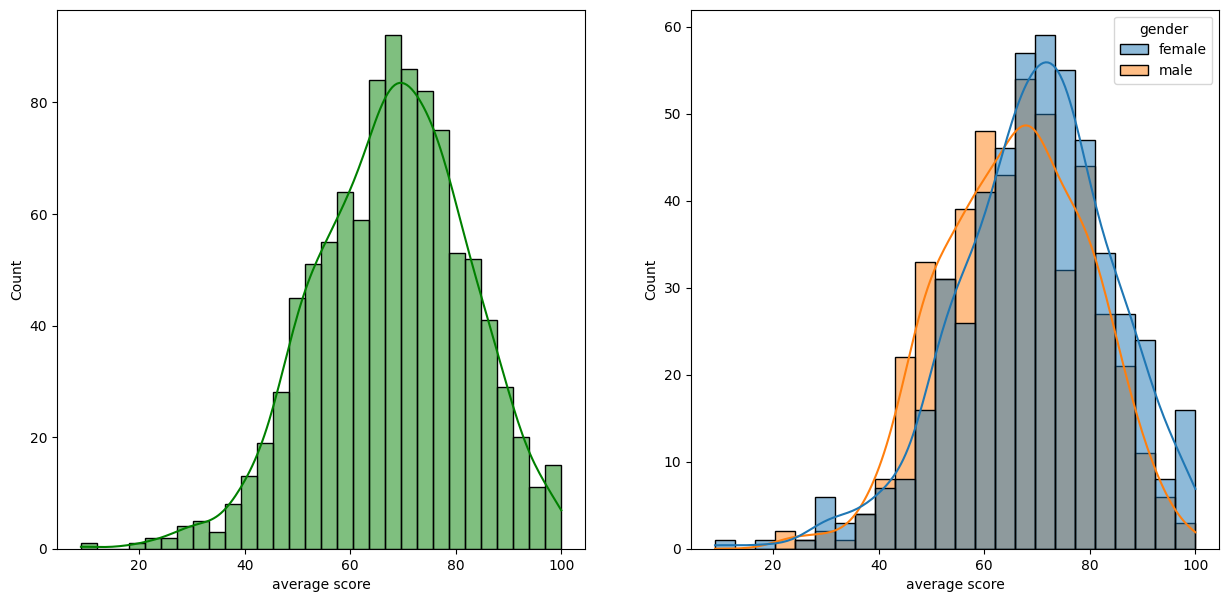

In [25]:
# Data Visualization

# Visualize average score distribution
# Histogram and KDE plot

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.show()

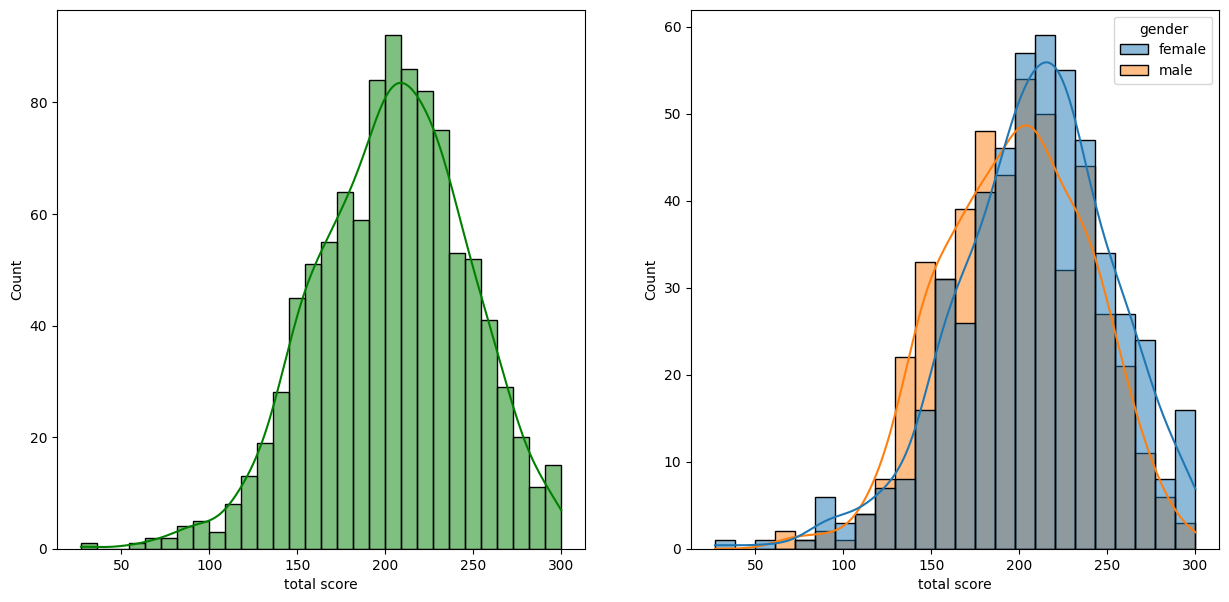

In [26]:
# Data Visualization

# Visualize average score distribution
# Histogram and KDE plot

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, bins=30, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

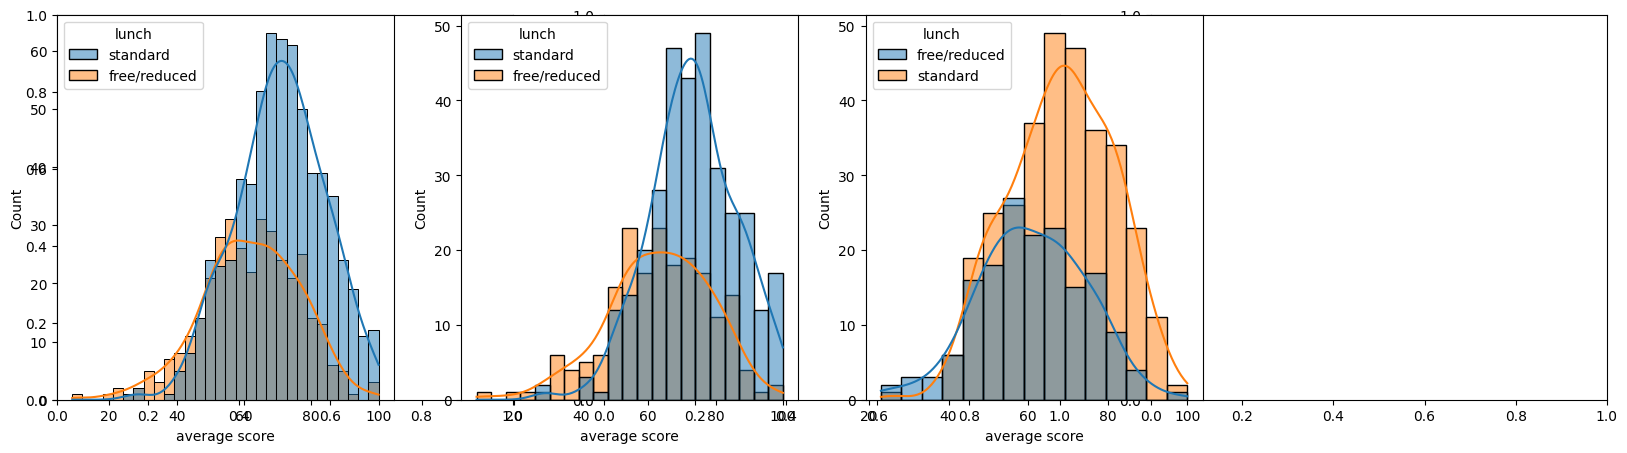

In [27]:
# Insights
# Female students are performing better than

plt.subplots(1,3, figsize=(20,5))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, bins=30, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='lunch')
plt.show()

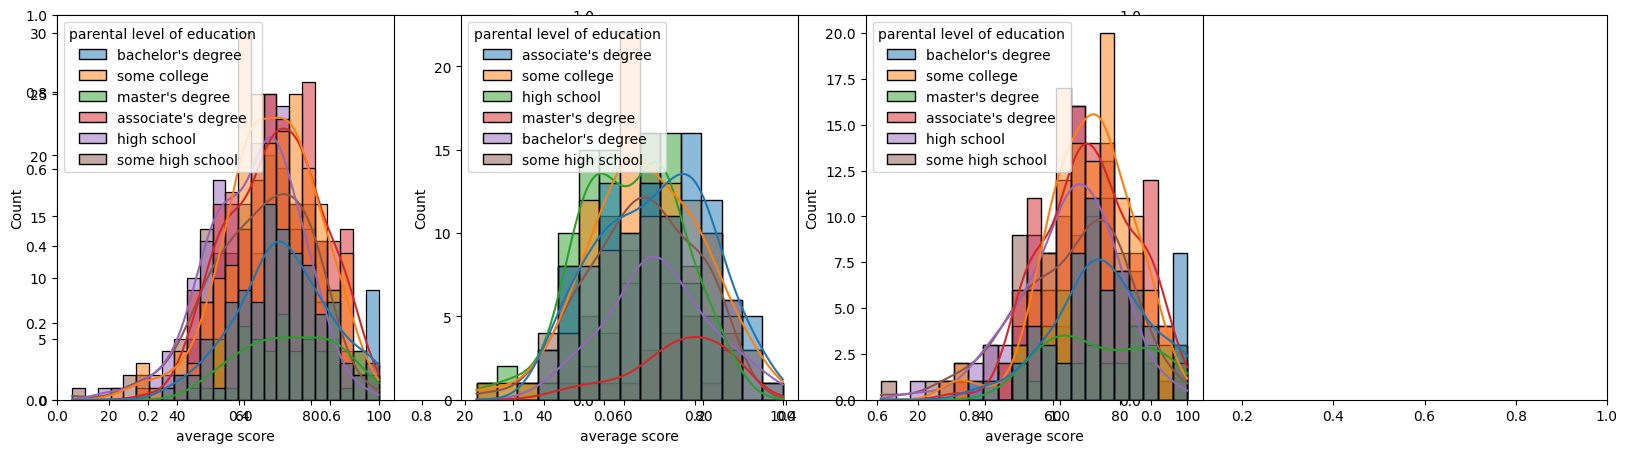

In [29]:
# Data visualization parental level of education
plt.subplots(1,3, figsize=(20,5))
plt.subplot(141)    
ax = sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')    
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'],x='average score', kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'],x='average score', kde=True, hue='parental level of education')
plt.show()


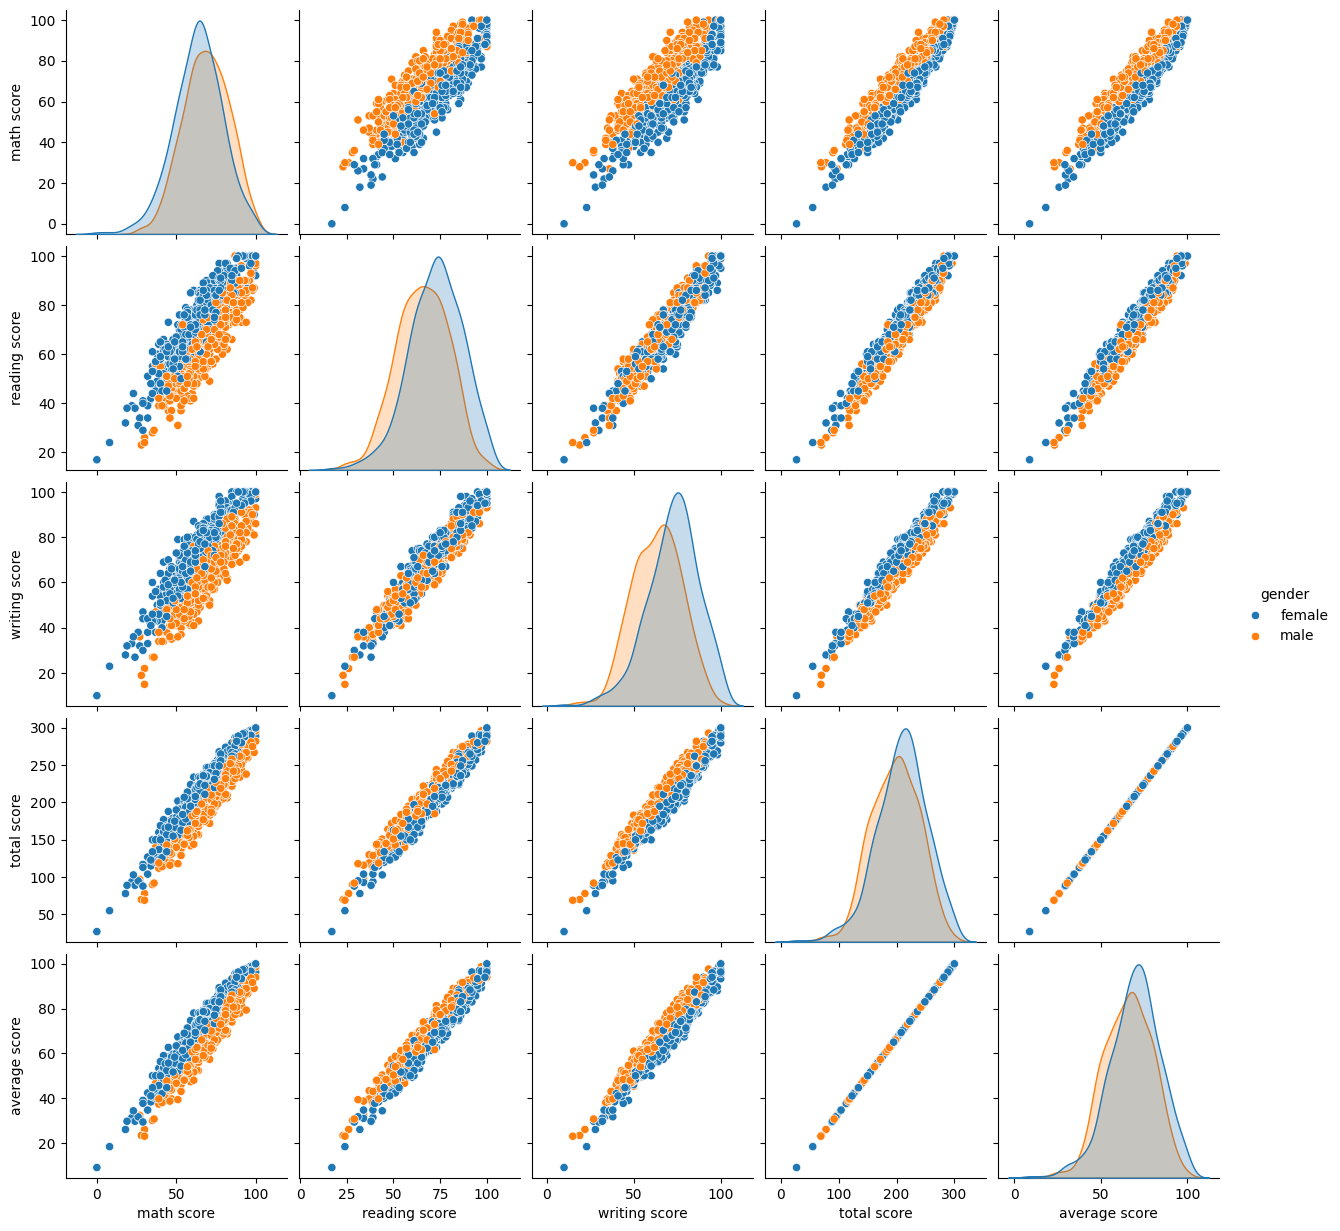

In [30]:
# Multivariate Analysis Using Pairplot
sns.pairplot(df, hue = 'gender')
plt.show()

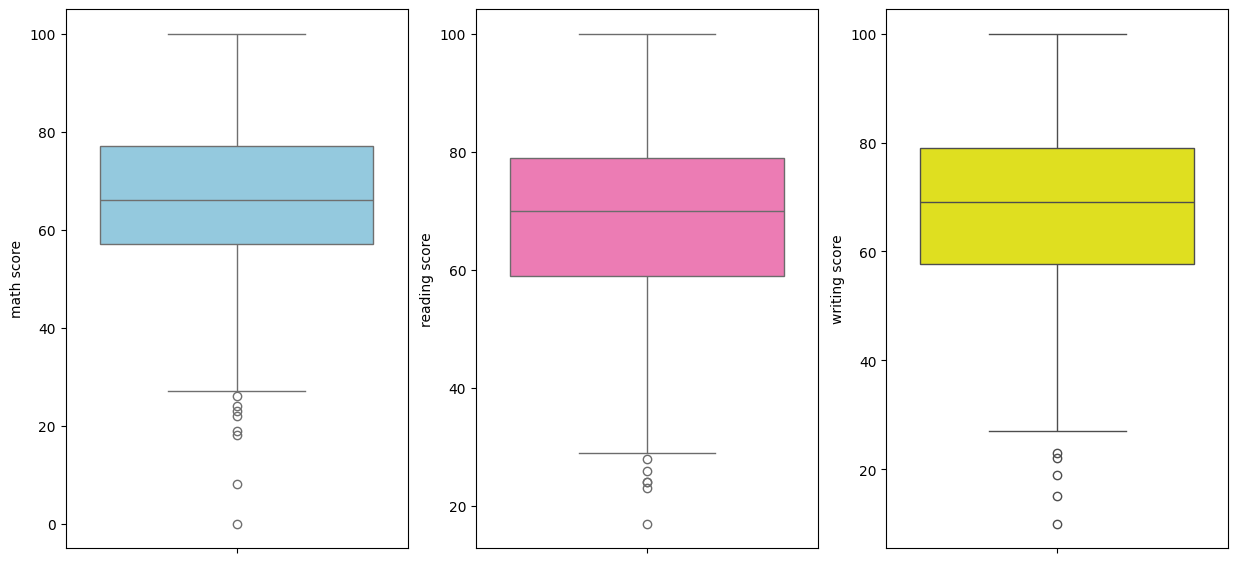

In [32]:
# Checking outliers using boxplot
plt.figure(figsize=(15,7))
plt.subplot(131)    
ax = sns.boxplot(y=df['math score'], color='skyblue')
plt.subplot(132)
ax = sns.boxplot(y=df['reading score'], color='hotpink')
plt.subplot(133)    
ax = sns.boxplot(y=df['writing score'], color='yellow')
#plt.subplot(134)
#ax = sns.boxplot(y=df['average score'], color='lightgreen') 
plt.show()
